<h1> CMSC320 Final Tutorial </h1>
Lucrecio Alberto, Stephanie Verduguez, Kyle Herock

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Data Cleaning </h2>


In [2]:
# import the dataset
data = pd.read_csv('winemag-data_first150k.csv')
# drop unused column
data = data.drop(['Unnamed: 0','region_2'], axis=1)
print(len(data))
data.head()

150930


,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [3]:
# a quick look at the data shows that there are many duplicates where the description is the same 
dupes = pd.concat(g for _, g in data.groupby("description") if len(g) > 1)
dupes.head()

,country,description,designation,points,price,province,region_1,variety,winery
62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister


In [4]:
#remove duplicate rows 
data = data.drop_duplicates('description')
print("After dropping duplicates, %d rows " % len(data))

# check NaN prices
nan_rows = data[data['price'].isnull()]
len_nans = len(nan_rows)
print("Dropping %d empty rows" % len_nans)

# drop NaN prices
data = data[pd.notnull(data.price)]
print("Rows after dropping NaN prices: %d " % len(data))

# remove nan countries
nan_rows = data[data['country'].isnull()]
len_nans = len(nan_rows)
print("dropping %d rows" % len_nans)
data = data[pd.notnull(data.country)]
print("Rows after dropping Nan Countries %d" % len(data))

data.head()

After dropping duplicates, 97821 rows 
Dropping 8713 empty rows
Rows after dropping NaN prices: 89108 
dropping 3 rows
Rows after dropping Nan Countries 89105


,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [62]:
continents = pd.read_csv('Countries-Continents-csv.csv',usecols=['Continent','Country'])
continents.rename(columns={'Country': 'country', "Continent":'continent'}, inplace=True)

def convert_us (country):
    if country == 'US':
        return 'United States'
    else:
        return country

data['country'] = data['country'].apply(convert_us)

data = pd.merge(new_data, continents, on='country', how='left')
data.head()

,country,description,designation,points,price,province,region_1,variety,winery,continent
0,United States,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,North America
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,Europe
2,United States,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,North America
3,United States,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,North America
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,Europe


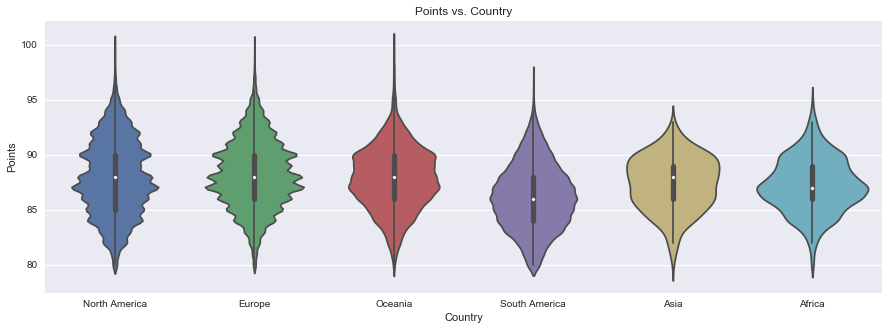

In [63]:
plt.subplots(figsize=(15,5))
sns.violinplot(x='continent',y='points',data=data)
plt.title('Points vs. Country')
plt.xlabel('Country')
plt.ylabel('Points')
plt.show()